In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [517]:
Dev_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/Develop Ind.csv")
HDI_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/human-development-index.csv")


In [518]:
HDI_df
HDI_df.shape

(5923, 4)

In [519]:
#Observing the structure of the dataset
HDI_df.head()
print(HDI_df.tail())
HDI_df[5890:5923]
HDI_df.info()

        Entity Code  Year  Human Development Index
5918  Zimbabwe  ZWE  2017                    0.594
5919  Zimbabwe  ZWE  2018                    0.602
5920  Zimbabwe  ZWE  2019                    0.601
5921  Zimbabwe  ZWE  2020                    0.600
5922  Zimbabwe  ZWE  2021                    0.593
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5923 non-null   object 
 1   Code                     5603 non-null   object 
 2   Year                     5923 non-null   int64  
 3   Human Development Index  5923 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 185.2+ KB


In [520]:
#Observing the structure of the dataset
Dev_df.head()
Dev_df.info()
print(Dev_df.shape)
Dev_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 57 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           6652 non-null   object 
 1   Country Code                                                                                           6650 non-null   object 
 2   Time                                                                                                   6650 non-null   float64
 3   Time Code                                                                                              6650 non-null   object 
 4   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                    

,Country Name,Country Code,Time,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
Glob_df = Dev_df.copy()
Glob_df.rename(columns={"Country Code": "Code"}, inplace=True)
Glob_df.rename(columns={"Time": "Year"}, inplace=True)

In [522]:
Glob_df.isnull().sum()
Glob_df[6645:6655]

,Country Name,Code,Year,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6645,World,WLD,2018.0,YR2018,..,27747000000,..,0.244465922682497,..,24.0005235602094,...,50.3153108944173,2.2352388374351,1525.14905010327,134627209.182,64.1199308252945,1.47400076017666,1.43138591397975,3.75679319335029,4.12928145527479,2.48444490542153
6646,World,WLD,2019.0,YR2019,..,27443000000,..,0.184136146546094,..,19.7759162303665,...,50.3081407578818,2.31155921067228,..,134725642.514,64.715262402012,1.38529872922998,1.35101476012157,3.77415436992569,4.14938317690655,2.13539857189219
6647,World,WLD,2020.0,YR2020,..,23320000000,..,0.144820387786694,..,..,...,50.2948196395522,2.49168211685821,..,134732038.315,65.2641487099283,1.35298230965981,1.36348244342479,4.29758070560122,4.54327875225854,1.46453859990474
6648,World,WLD,2021.0,YR2021,..,26540000000,..,0.262040813565189,..,..,...,50.2776758409845,2.71192656212256,..,140486936.909,63.9688548634094,1.40195907882602,1.41048498733681,4.86302391635145,5.30214304764037,3.02947686313513
6649,World,WLD,2022.0,YR2022,..,31739000000,..,..,..,..,...,50.2647173965581,..,..,..,..,1.32866140371674,1.28208099632635,4.25557953405654,4.74993052271817,..
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [523]:
Glob_df[5424:6656]
#Upon inspecting NaN data, it has been observed that there are also aggregates of geographic areas.
#Therefore, deleting all rows below the last country in the dataset
Glob_df.drop(Glob_df.index[5425:6656], inplace=True)

In [524]:
print(Glob_df.shape)
print(HDI_df.shape)

(5425, 57)
(5923, 4)


In [525]:
#Now changing the type of Year in Glob_df to match the type of HDI_df.
Glob_df["Year"] = Glob_df["Year"].astype(int)

print(f"{Glob_df.columns}\n{HDI_df.columns}")

Index(['Country Name', 'Code', 'Year', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.

In [526]:
#Setting index
Glob_df = Glob_df.set_index(["Code", "Year"])
HDI_df = HDI_df.set_index(["Code", "Year"])

In [527]:
print(HDI_df)
print(Glob_df)

                Entity  Human Development Index
Code Year                                      
AFG  1990  Afghanistan                    0.273
     1991  Afghanistan                    0.279
     1992  Afghanistan                    0.287
     1993  Afghanistan                    0.297
     1994  Afghanistan                    0.292
...                ...                      ...
ZWE  2017     Zimbabwe                    0.594
     2018     Zimbabwe                    0.602
     2019     Zimbabwe                    0.601
     2020     Zimbabwe                    0.600
     2021     Zimbabwe                    0.593

[5923 rows x 2 columns]
          Country Name Time Code  \
Code Year                          
AFG  1998  Afghanistan    YR1998   
     1999  Afghanistan    YR1999   
     2000  Afghanistan    YR2000   
     2001  Afghanistan    YR2001   
     2002  Afghanistan    YR2002   
...                ...       ...   
ZWE  2018     Zimbabwe    YR2018   
     2019     Zimbabwe    Y

In [528]:
#Checking for null values before the merge.
print(f"{Glob_df.isnull().sum()}\n{HDI_df.isnull().sum()}")

Country Name                                                                                             0
Time Code                                                                                                0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                          0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       0
Current health expenditure (% of GDP)

In [529]:
print(HDI_df[5855:5940])

             Entity  Human Development Index
Code Year                                   
YEM  2018     Yemen                    0.459
     2019     Yemen                    0.461
     2020     Yemen                    0.460
     2021     Yemen                    0.455
ZMB  1990    Zambia                    0.412
...             ...                      ...
ZWE  2017  Zimbabwe                    0.594
     2018  Zimbabwe                    0.602
     2019  Zimbabwe                    0.601
     2020  Zimbabwe                    0.600
     2021  Zimbabwe                    0.593

[68 rows x 2 columns]


In [530]:
#Performing the merge using how="left" to utilize only keys from the left frame and using the index of both datasets for the merge.
Glob_df = Glob_df.merge(HDI_df["Human Development Index"], left_index=True, right_index=True, how="left")
#Checking for NaN values created by the merge
Glob_df["Human Development Index"].isnull().value_counts()

Glob_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5425 entries, ('ABW', 1998) to ('ZWE', 2022)
Data columns (total 56 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           5425 non-null   object 
 1   Time Code                                                                                              5425 non-null   object 
 2   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                           5425 non-null   object 
 3   Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                           5425 non-null   object 
 4   Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]              

In [531]:
Glob_df.to_csv("Glob_df.csv", index= True)

In [532]:
HDI_nan_countries = Glob_df.groupby("Code")["Human Development Index"].agg(lambda x : x.isnull().sum())
HDI_nan_countries

Code
ABW    25
AFG     1
AGO     2
ALB     1
AND     3
       ..
XKX    25
YEM     1
ZAF     1
ZMB     1
ZWE     1
Name: Human Development Index, Length: 217, dtype: int64

In [533]:
#Observing the number of countries with no data for the HDI
HDI_nan_countries[HDI_nan_countries == 25].index


Index(['ABW', 'ASM', 'BMU', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM',
       'IMN', 'MAC', 'MAF', 'MCO', 'MNP', 'NCL', 'NRU', 'PRI', 'PRK', 'PYF',
       'SOM', 'SXM', 'TCA', 'VGB', 'VIR', 'XKX'],
      dtype='object', name='Code')

In [534]:
#This country code was not found in HDI_df. Confirmed by checking examples: HDI_df.loc["GUM"] and HDI_df.loc["SXM"]

In [535]:
#The other countries with NaN values are due to a mismatch between years in the two merged datasets.
#(Every country has at least one because the year 2022 was not present in the HDI_df).
#The decision has been made to exclude the year 2022 and retain only countries with less than 5 NaN values.

HDI_df.loc["AGO"]
HDI_df.loc["GNB"]
HDI_df.loc["AND"]

,Entity,Human Development Index
Year,,
2000,Andorra,0.818
2001,Andorra,0.825
2002,Andorra,0.832
2003,Andorra,0.841
2004,Andorra,0.833
2005,Andorra,0.833
2006,Andorra,0.848
2007,Andorra,0.847
2008,Andorra,0.850


In [536]:
#Countries with more than 4 NaN values in the HDI column have been identified
HDI_too_nan = HDI_nan_countries[(HDI_nan_countries > 5)]

#Checking the countries with too many NaN values in the HDI column
HDI_too_nan.index

Index(['ABW', 'ASM', 'ATG', 'BMU', 'BTN', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB',
       'GNB', 'GRL', 'GUM', 'IMN', 'KNA', 'LBN', 'MAC', 'MAF', 'MCO', 'MHL',
       'MNE', 'MNP', 'NCL', 'NGA', 'NRU', 'PRI', 'PRK', 'PSE', 'PYF', 'SMR',
       'SOM', 'SSD', 'SUR', 'SXM', 'TCA', 'TKM', 'VGB', 'VIR', 'VUT', 'XKX'],
      dtype='object', name='Code')

In [537]:
#Creating the mask for the countries to retain.
HDI_few_nan = HDI_nan_countries[HDI_nan_countries <= 4]
HDI_few_nan

Code
AFG    1
AGO    2
ALB    1
AND    3
ARE    1
      ..
WSM    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: Human Development Index, Length: 174, dtype: int64

In [538]:
#Applying the boolean mask to filter the desired countries
Glob_df2 = Glob_df[Glob_df.index.get_level_values("Code").isin(HDI_few_nan.index)]

Glob_df2.isna().sum()

Country Name                                                                                               0
Time Code                                                                                                  0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                               0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                               0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                              0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                  0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                            0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                  0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                         0
Current health expe

In [539]:
#Replacing dots with NaN throughout the dataframe to estimate the real number of NaN values in the columns
Glob_df2.replace("..", np.nan, inplace=True)

Glob_df2.isna().sum()

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\967629881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glob_df2.replace("..", np.nan, inplace=True)


Country Name                                                                                                0
Time Code                                                                                                   0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             3290
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             1691
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            2991
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                 329
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                           305
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                1653
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       3951
Current he

In [540]:
#The year 2022 contains too many NaN values in the columns essential for my analysis. 
#Additionally, the HDI does not have values for any country in this year.
Glob_df2.isna().groupby("Year").sum()

,Country Name,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],...,Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index
Year,,,,,,,,,,,,,,,,,,,,,
1998,0,0,136,78,115,8,25,174,173,174,...,108,126,1,24,45,47,47,45,4,22
1999,0,0,136,76,116,8,22,174,174,174,...,106,125,1,22,38,41,41,38,4,17
2000,0,0,131,76,121,7,18,174,173,5,...,101,125,0,18,25,25,25,25,2,0
2001,0,0,137,82,125,7,16,174,174,5,...,94,120,0,17,21,24,24,21,2,0
2002,0,0,130,78,125,6,15,174,171,4,...,83,116,0,16,21,21,24,21,1,0
2003,0,0,137,85,128,6,15,46,172,3,...,88,115,0,14,21,22,23,21,1,0
2004,0,0,129,77,131,6,12,39,169,3,...,87,115,0,14,18,21,20,18,1,0
2005,0,0,131,69,128,5,11,25,161,3,...,87,109,0,14,24,23,23,24,0,0
2006,0,0,124,70,124,5,9,22,156,3,...,93,111,0,8,23,26,27,23,0,0


In [541]:
Glob_df2.drop(index=2022, level="Year", inplace = True) 

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\3889601396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glob_df2.drop(index=2022, level="Year", inplace = True)


In [542]:
print(Glob_df2.columns)
#Dropping columns that are not essential for the analysis and contain too many NaN values
columns_to_drop = ["Country Name", "Time Code", "Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]",
"Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]", "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",
"Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]",
"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",
"Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]", "Gross savings (% of GDP) [NY.GNS.ICTR.ZS]", 
"Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]", "Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]", 
"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]", "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",
"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]", "Interest payments (% of expense) [GC.XPN.INTP.ZS]",
"Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6]", "Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]",
"Labor force, total [SL.TLF.TOTL.IN]", "Land area (sq. km) [AG.LND.TOTL.K2]",
"Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]", "Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS]",
"Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]", "Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]",
"Population, female (% of total population) [SP.POP.TOTL.FE.ZS]", "Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",
"Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN]", 
"Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN]", "Surface area (sq. km) [AG.SRF.TOTL.K2]"]

Glob_df2 = Glob_df2.drop(columns=columns_to_drop)

Index(['Country Name', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Fo

In [543]:
Glob_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4176 entries, ('AFG', 1998) to ('ZWE', 2021)
Data columns (total 27 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                  4021 non-null   object 
 1   Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                  3592 non-null   object 
 2   Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                  3706 non-null   object 
 3   Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                4151 non-null   object 
 4   Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                3480 non-null   object 
 5   Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                3623 non-null   object 
 6   GDP (constant 2015 US$) [NY.GDP.MKT

In [544]:
print(Glob_df2.columns)

Index(['Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]',
       'Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]',
       'Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]',
       'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]', 'Gini index [SI.POV.GINI]',
       'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]',
       'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
       'Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]',
       'Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN]',
       'Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]',
       'Merchandise imports (current US$) [TM.VAL.MRCH.CD

In [545]:
Glob_df2.to_csv("Glob_df2.csv", index= True)

In [546]:
#Observing countries with NaN values in the GDP (current US$) column.
GDPcurrent_mask = Glob_df2.groupby("Code")["GDP (current US$) [NY.GDP.MKTP.CD]"].agg(lambda x : x.isnull().sum())
GDPcurrent_mask[GDPcurrent_mask != 0]

Code
AFG    4
LBR    2
PLW    2
STP    3
VEN    7
YEM    3
Name: GDP (current US$) [NY.GDP.MKTP.CD], dtype: int64

In [547]:
#Obtaining an overview of the countries with missing values in the key indices for my analysis
GDP2015_mask = Glob_df2.groupby("Code")["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"].agg(lambda x : x.isnull().sum())
GDP2015_mask[GDP2015_mask != 0]

Code
AFG     4
DJI    15
LBR     2
LBY     1
LIE    23
PLW     2
QAT     2
STP     3
VEN    24
YEM     3
Name: GDP (constant 2015 US$) [NY.GDP.MKTP.KD], dtype: int64

In [548]:
#Selecting countries with less than 5 NaN values for the GDP (constant 2015 US$) column.
GDP2015_few_nan = GDP2015_mask[GDP2015_mask < 5]

#Filtering the dataframe to include only the selected countries
Glob_df2 = Glob_df2[Glob_df2.index.get_level_values("Code").isin(GDP2015_few_nan.index)]

In [549]:
Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     124
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     554
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     424
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    17
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   640
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   498
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       17
GDP (current US$) [NY.GDP.MKTP.CD]                                             14
Gini index [SI.POV.GINI]                                                     2552
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1061
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     424
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        262
Manufactures exp

In [550]:
Glob_df3 = Glob_df2.copy()

In [551]:
#Selecting columns with data type "object" and applying the pd.to_numeric function to convert to numeric format.
#This transformation assists in converting non-numeric data to numeric, replacing non-convertible values with NaN.

columns_to_convert = Glob_df3.columns[Glob_df3.dtypes == "object"]
Glob_df3[columns_to_convert] = Glob_df3[columns_to_convert].apply(pd.to_numeric)

In [552]:
Glob_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4104 entries, ('AFG', 1998) to ('ZWE', 2021)
Data columns (total 27 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                  3980 non-null   float64
 1   Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                  3550 non-null   float64
 2   Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                  3680 non-null   float64
 3   Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                4087 non-null   float64
 4   Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                3464 non-null   float64
 5   Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                3606 non-null   float64
 6   GDP (constant 2015 US$) [NY.GDP.MKT

In [553]:
Glob_df3.isna().sum() == Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                    True
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    True
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                    True
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                  True
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                  True
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                  True
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                     True
GDP (current US$) [NY.GDP.MKTP.CD]                                           True
Gini index [SI.POV.GINI]                                                     True
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    True
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                    True
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                       True
Manufactures exp

In [554]:
#Function to interpolate NaN data for each country. This method is chosen for its ease of use and effectiveness with time series data(work better than mean or other methods)
#The parameter limit_direction = "both" ensures interpolation works on both sides of the values in the column.
def interpolate_country_nan(df, column_name, limit=None):

    for code in df.index.get_level_values("Code").unique():
        country_data = df.loc[code][column_name]
        
        country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [555]:
interpolate_country_nan(Glob_df3,"Human Development Index", limit= None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [556]:
interpolate_country_nan(Glob_df3,"GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [557]:
interpolate_country_nan(Glob_df3,"GDP (current US$) [NY.GDP.MKTP.CD]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [558]:
Glob_df3.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     124
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     554
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     424
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                    17
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   640
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   498
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                        0
GDP (current US$) [NY.GDP.MKTP.CD]                                              0
Gini index [SI.POV.GINI]                                                     2552
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1061
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     424
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        262
Manufactures exp

In [559]:
Glob_df3.index

MultiIndex([('AFG', 1998),
            ('AFG', 1999),
            ('AFG', 2000),
            ('AFG', 2001),
            ('AFG', 2002),
            ('AFG', 2003),
            ('AFG', 2004),
            ('AFG', 2005),
            ('AFG', 2006),
            ('AFG', 2007),
            ...
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016),
            ('ZWE', 2017),
            ('ZWE', 2018),
            ('ZWE', 2019),
            ('ZWE', 2020),
            ('ZWE', 2021)],
           names=['Code', 'Year'], length=4104)

In [560]:
#Plotting all countries to display the values during the specified period for each country, providing an overview of the distribution.
def plot_all_countries(dataframe, column_name):
    data = dataframe[column_name]
    plt.figure(figsize=(15, 8))

    for code, country_data in data.groupby("Code"):
        plt.plot(country_data.index.get_level_values("Year"), country_data.values, label=code)

    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} (1998-2022)")
    plt.grid()

    plt.show()

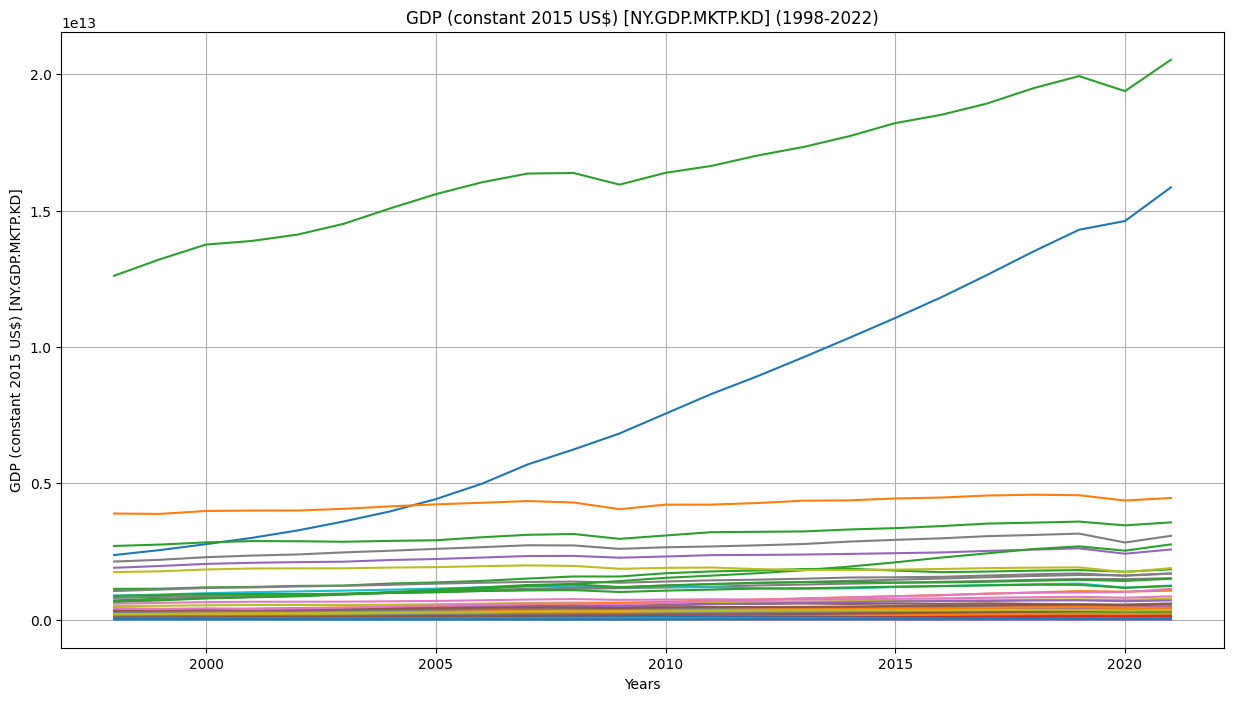

In [561]:
plot_all_countries(Glob_df3, "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]")

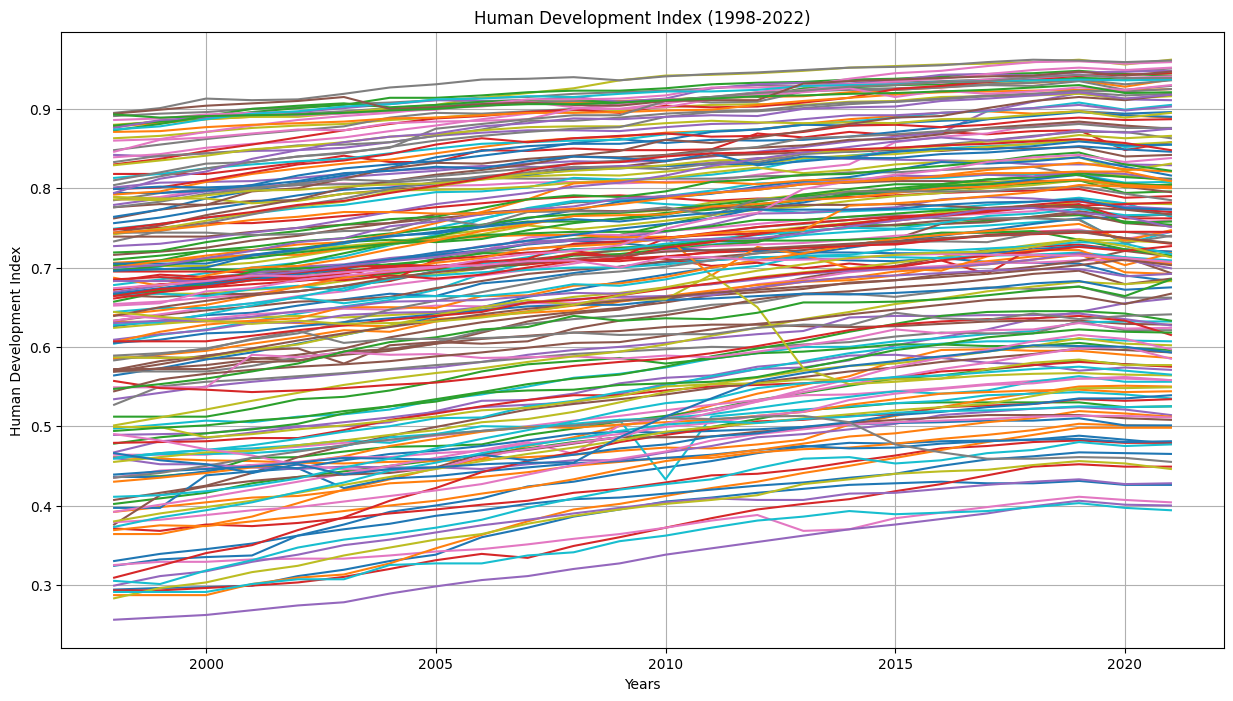

In [562]:
plot_all_countries(Glob_df3, "Human Development Index")

In [563]:
#Creating a column for GDP per capita, adjusted for inflation.

Glob_df3["GDP_pc"] = Glob_df3["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"] / Glob_df3["Population, total [SP.POP.TOTL]"]

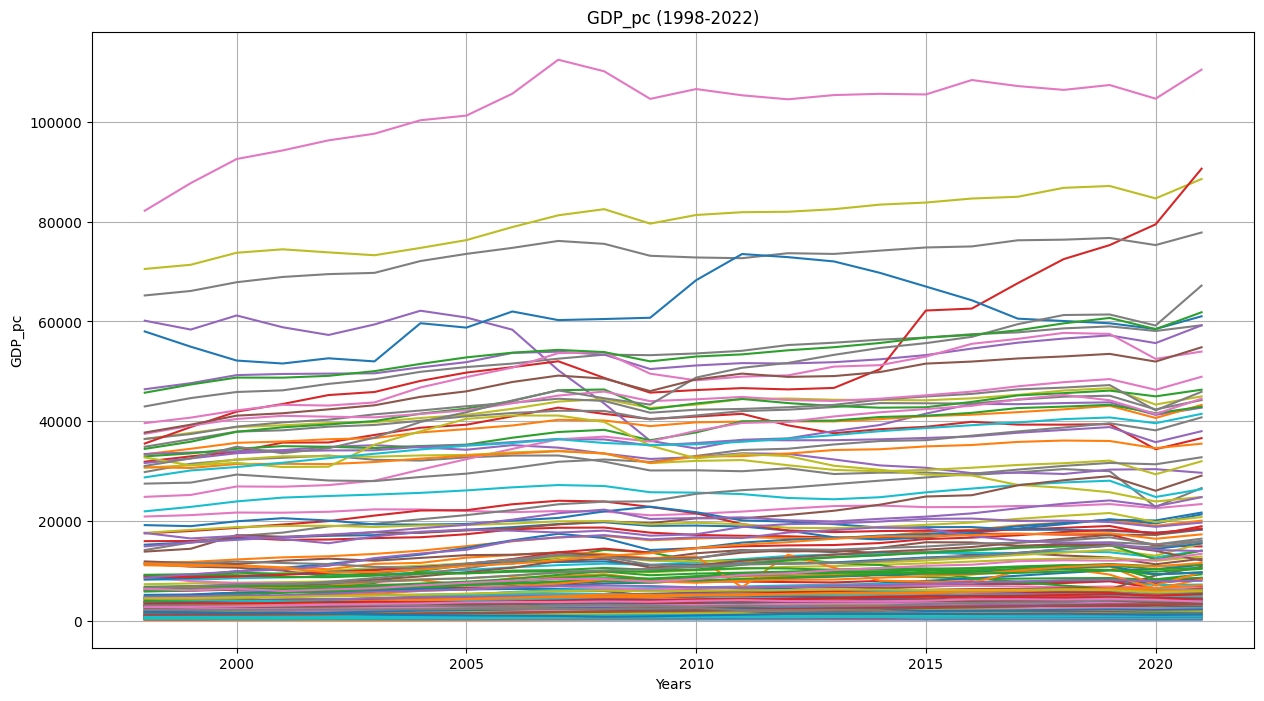

In [564]:
plot_all_countries(Glob_df3, "GDP_pc")

In [565]:
#Observing the 10 highest GDP per capita values in the world for the year 2021
Glob_df3.loc[Glob_df3.index.get_level_values("Year") == 2021, "GDP_pc"].nlargest(10)

Code  Year
LUX   2021    110425.888433
IRL   2021     90589.196731
CHE   2021     88520.322001
NOR   2021     77805.007548
SGP   2021     67175.863999
USA   2021     61829.845627
QAT   2021     61022.502896
AUS   2021     59225.524540
DNK   2021     59205.646688
SWE   2021     54816.005849
Name: GDP_pc, dtype: float64

In [566]:
Glob_df3.columns

Index(['Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]',
       'Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]',
       'Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]',
       'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]', 'Gini index [SI.POV.GINI]',
       'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]',
       'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
       'Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]',
       'Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN]',
       'Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]',
       'Merchandise imports (current US$) [TM.VAL.MRCH.CD

In [567]:
#Modifying column titles for shorter names.
columns = ["Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]","Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]",
           "Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]","Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]",
           "Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]","Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]",
           "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]","GDP (current US$) [NY.GDP.MKTP.CD]", "Gini index [SI.POV.GINI]",
           "Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]",
           "Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]",
           "Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN]","Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]",
           "Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT]","Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS]",
           "Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]","Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS]",
           "Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS]","Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS]",
           "Population, total [SP.POP.TOTL]","Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]",
           "Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN]","Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN]",
           "Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]","Human Development Index","GDP_pc"]

cleaned_columns = [col[:col.find("[")].strip() if "[" in col else col for col in columns]
Glob_df3.columns = cleaned_columns

In [568]:
Glob_df3.to_csv("Glob_df3.csv", index= True)

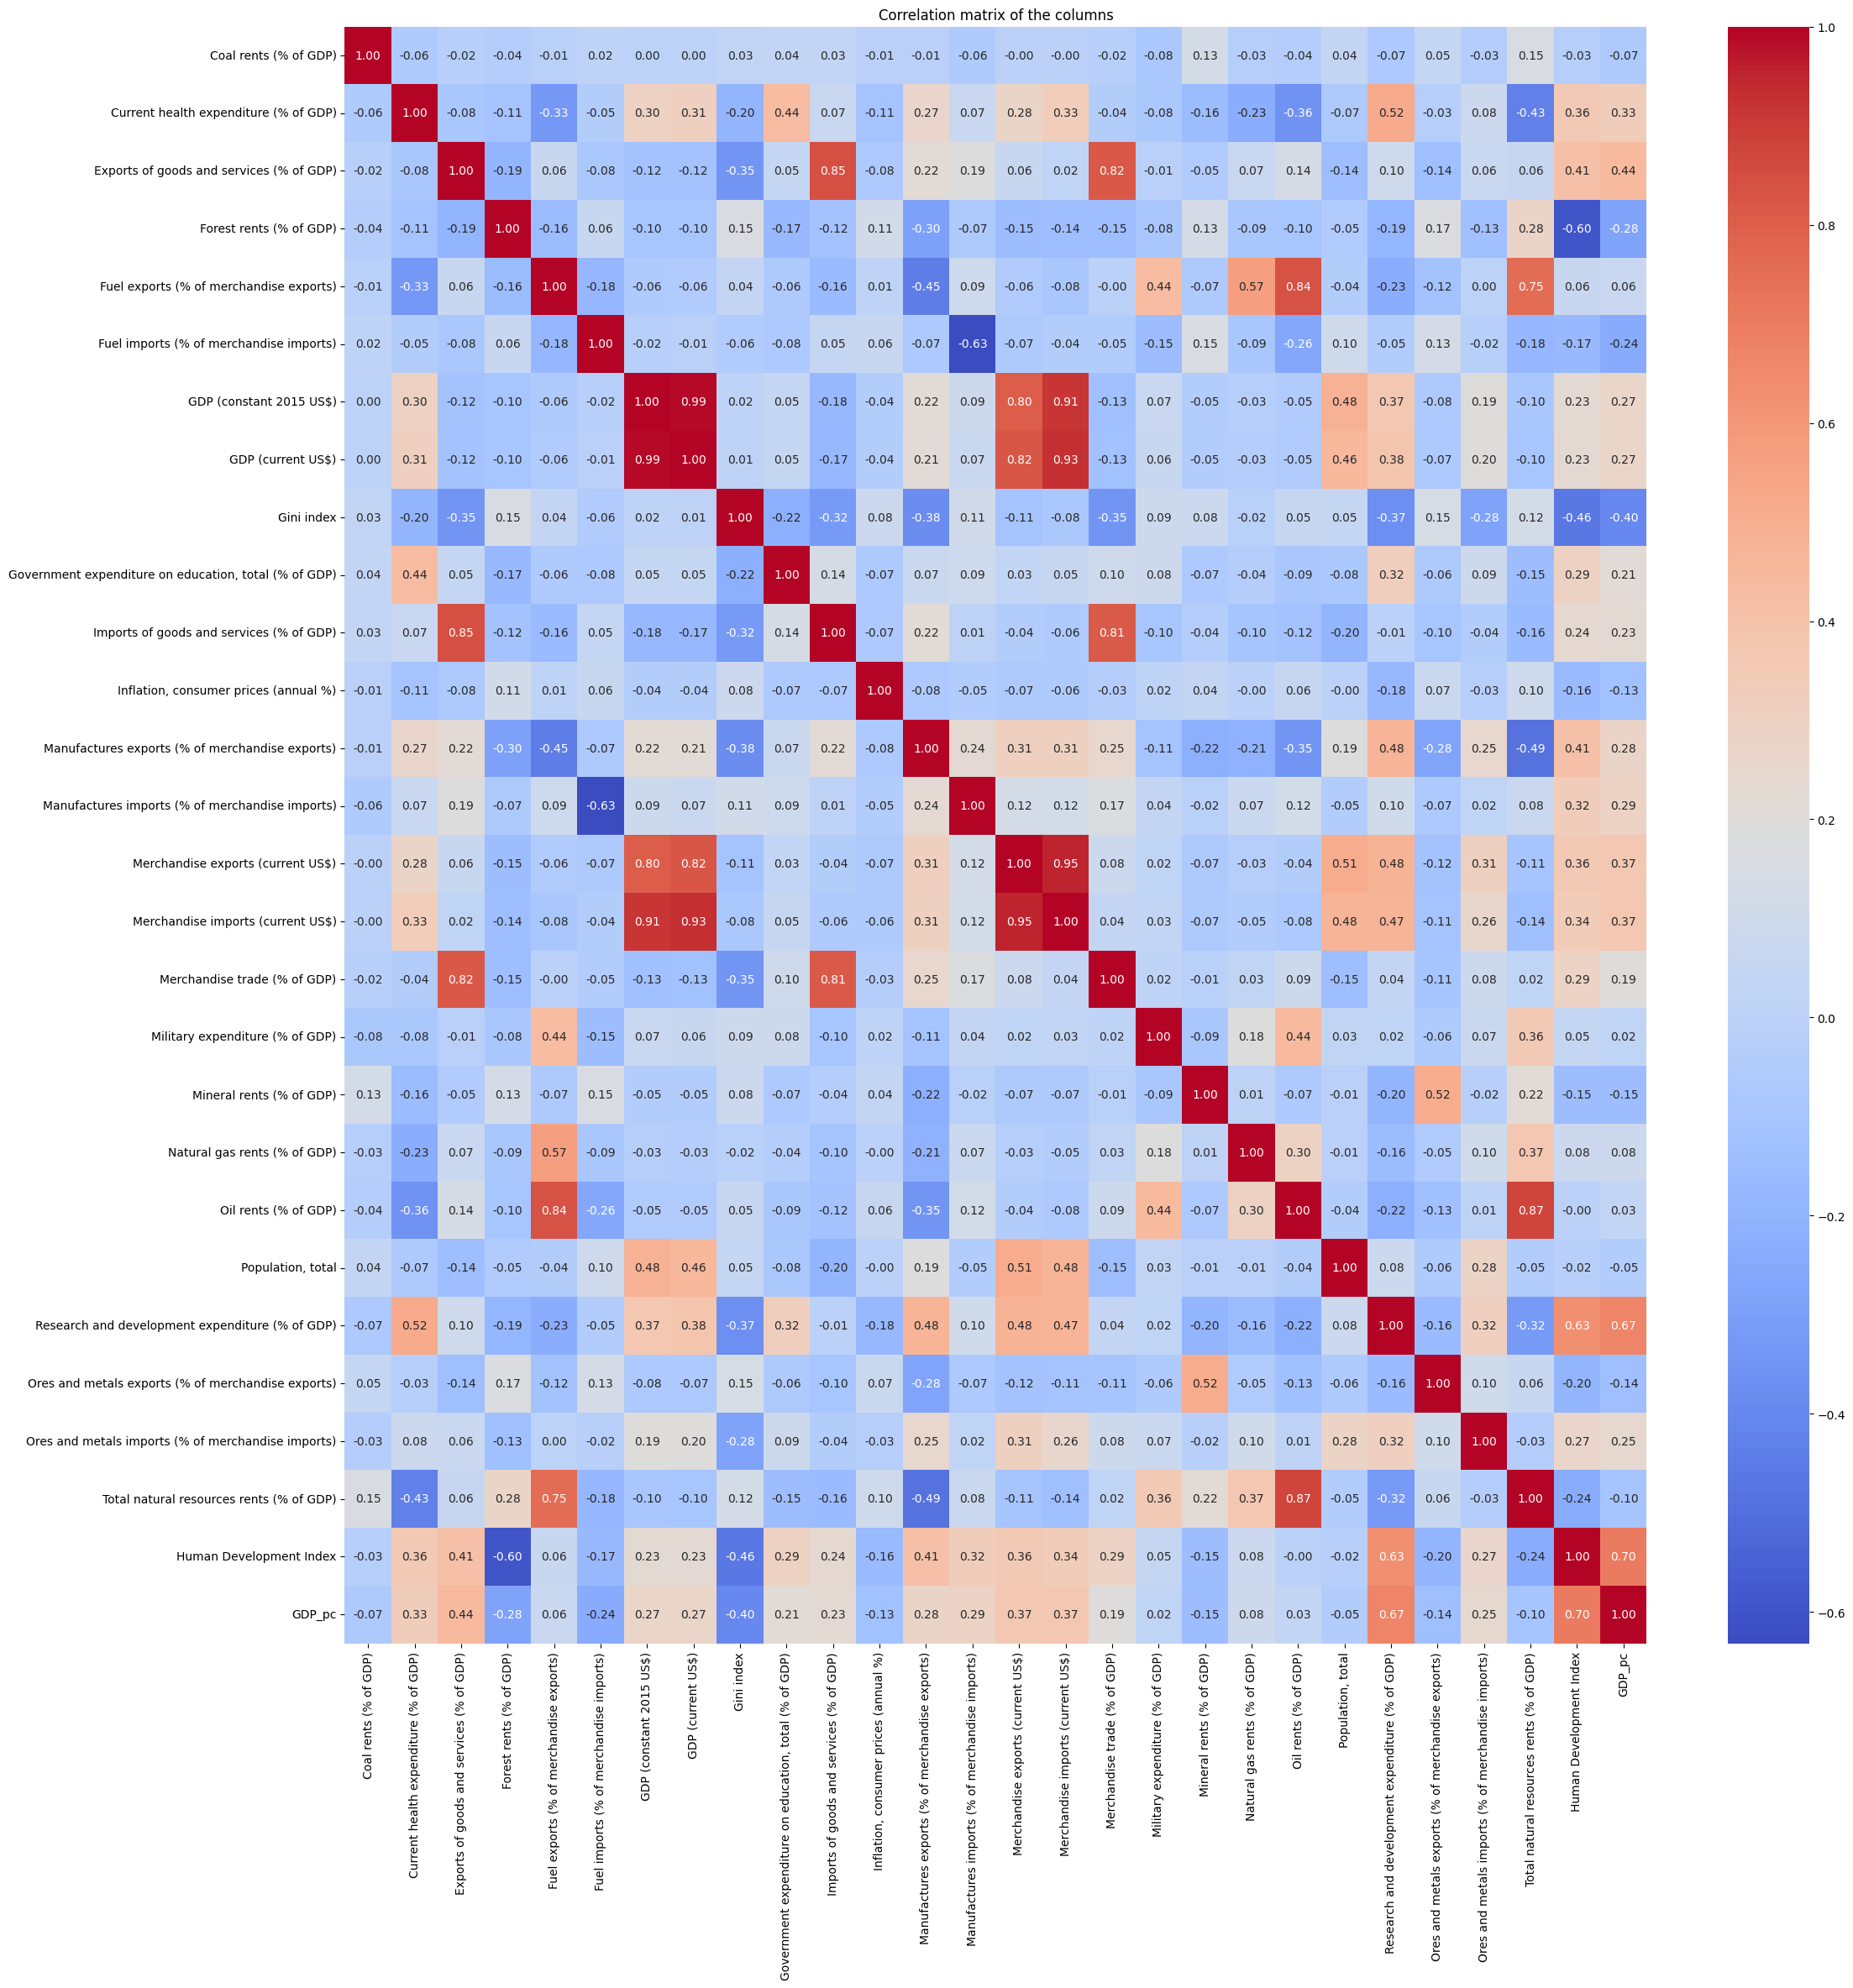

In [569]:
#Visualizing the correlation matrix of the columns.
import seaborn as sns

correlation_matrix = Glob_df3.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix of the columns")
plt.show()

In [570]:
#Creating a new dataset to interpolate the other columns useful for the analysis
Glob_df4 = Glob_df3

In [571]:
Glob_df4.isna().groupby("Code").sum()

,Coal rents (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Forest rents (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (constant 2015 US$),GDP (current US$),Gini index,"Government expenditure on education, total (% of GDP)",...,Mineral rents (% of GDP),Natural gas rents (% of GDP),Oil rents (% of GDP),"Population, total",Research and development expenditure (% of GDP),Ores and metals exports (% of merchandise exports),Ores and metals imports (% of merchandise imports),Total natural resources rents (% of GDP),Human Development Index,GDP_pc
Code,,,,,,,,,,,,,,,,,,,,,
AFG,4,4,22,4,20,12,0,0,24,12,...,4,4,4,0,24,16,15,4,0,0
AGO,0,3,4,0,10,10,0,0,21,7,...,0,0,0,0,23,10,10,0,0,0
ALB,0,5,0,0,0,0,0,0,13,1,...,0,0,0,0,22,0,0,0,0,0
AND,24,3,24,0,0,1,0,0,24,5,...,0,24,24,0,24,0,1,0,0,0
ARE,0,3,4,0,1,1,0,0,22,21,...,0,0,0,0,16,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0,3,4,0,4,4,0,0,21,11,...,0,0,0,0,24,4,4,0,0,0
YEM,3,8,3,3,8,7,0,0,21,11,...,3,3,3,0,24,7,7,3,0,0
ZAF,0,3,0,0,0,0,0,0,19,1,...,0,0,0,0,5,0,0,0,0,0


In [572]:
Glob_df4.isna().sum()

Coal rents (% of GDP)                                     124
Current health expenditure (% of GDP)                     554
Exports of goods and services (% of GDP)                  424
Forest rents (% of GDP)                                    17
Fuel exports (% of merchandise exports)                   640
Fuel imports (% of merchandise imports)                   498
GDP (constant 2015 US$)                                     0
GDP (current US$)                                           0
Gini index                                               2552
Government expenditure on education, total (% of GDP)    1061
Imports of goods and services (% of GDP)                  424
Inflation, consumer prices (annual %)                     262
Manufactures exports (% of merchandise exports)           512
Manufactures imports (% of merchandise imports)           498
Merchandise exports (current US$)                          29
Merchandise imports (current US$)                          26
Merchand

In [573]:
Glob_df4.groupby("Code").apply(lambda x: x.isnull().sum())

,Coal rents (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Forest rents (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (constant 2015 US$),GDP (current US$),Gini index,"Government expenditure on education, total (% of GDP)",...,Mineral rents (% of GDP),Natural gas rents (% of GDP),Oil rents (% of GDP),"Population, total",Research and development expenditure (% of GDP),Ores and metals exports (% of merchandise exports),Ores and metals imports (% of merchandise imports),Total natural resources rents (% of GDP),Human Development Index,GDP_pc
Code,,,,,,,,,,,,,,,,,,,,,
AFG,4,4,22,4,20,12,0,0,24,12,...,4,4,4,0,24,16,15,4,0,0
AGO,0,3,4,0,10,10,0,0,21,7,...,0,0,0,0,23,10,10,0,0,0
ALB,0,5,0,0,0,0,0,0,13,1,...,0,0,0,0,22,0,0,0,0,0
AND,24,3,24,0,0,1,0,0,24,5,...,0,24,24,0,24,0,1,0,0,0
ARE,0,3,4,0,1,1,0,0,22,21,...,0,0,0,0,16,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0,3,4,0,4,4,0,0,21,11,...,0,0,0,0,24,4,4,0,0,0
YEM,3,8,3,3,8,7,0,0,21,11,...,3,3,3,0,24,7,7,3,0,0
ZAF,0,3,0,0,0,0,0,0,19,1,...,0,0,0,0,5,0,0,0,0,0


In [574]:
interpolate_country_nan(Glob_df4,"Total natural resources rents (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [575]:
#Selecting the first 15 countries based on GDP (constant 2015 US$) values in 2021
sorted_21_gdp_df = Glob_df4.loc[Glob_df4.index.get_level_values("Year") == 2021].sort_values(by="GDP (constant 2015 US$)", ascending=False)
top_gdp9_countries = sorted_21_gdp_df.head(9) #for the line graph of the gdp performance
top_gdp_countries = sorted_21_gdp_df.head(15) #Selecting the top 15 countries usefulfor the dataset in the futures graph
print(top_gdp_countries.index.get_level_values("Code"))
print(sorted_21_gdp_df)

Index(['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'BRA', 'KOR',
       'CAN', 'AUS', 'RUS', 'ESP', 'MEX'],
      dtype='object', name='Code')
           Coal rents (% of GDP)  Current health expenditure (% of GDP)  \
Code Year                                                                 
USA  2021               0.165542                                    NaN   
CHN  2021               0.607569                                    NaN   
JPN  2021               0.000357                                    NaN   
DEU  2021               0.014481                              12.805395   
GBR  2021               0.001023                              11.939087   
...                          ...                                    ...   
STP  2021               0.000000                                    NaN   
FSM  2021                    NaN                                    NaN   
PLW  2021                    NaN                                    NaN   
KIR  2021           

In [576]:
top_gdp_countries["GDP (constant 2015 US$)"]

Code  Year
USA   2021    2.052946e+13
CHN   2021    1.585128e+13
JPN   2021    4.462649e+12
DEU   2021    3.569114e+12
GBR   2021    3.075810e+12
IND   2021    2.761585e+12
FRA   2021    2.575192e+12
ITA   2021    1.891178e+12
BRA   2021    1.847863e+12
KOR   2021    1.696543e+12
CAN   2021    1.690932e+12
AUS   2021    1.521232e+12
RUS   2021    1.502645e+12
ESP   2021    1.251379e+12
MEX   2021    1.236699e+12
Name: GDP (constant 2015 US$), dtype: float64

In [577]:
top_gdp_countries.to_csv("top_gdp_countries.csv", index= True)

In [578]:
#The new dataset with all the values and columns for each country
GDP_cons_df = Glob_df4.loc[Glob_df4.index.get_level_values("Code").isin(top_gdp_countries.index.get_level_values("Code"))]
GDP_cons_df


Coal rents (% of GDP)  Current health expenditure (% of GDP)  \
Code Year                                                                 
AUS  1998               0.175056                                    NaN   
     1999               0.107427                                    NaN   
     2000               0.184104                               7.599617   
     2001               0.634982                               7.682723   
     2002               0.402755                               7.878076   
...                          ...                                    ...   
USA  2017               0.182333                              16.767937   
     2018               0.198370                              16.640944   
     2019               0.131587                              16.676474   
     2020               0.083695                              18.815826   
     2021               0.165542                                    NaN   

           Exports of goods and services (% of GDP)  Forest rents (% of GDP)  \
Code Year                                                                      
AUS  1998                                 19.557566                 0.189067   
     1999                                 18.294744                 0.160988   
     2000                                 19.390228                 0.177575   
     2001                                 22.152326                 0.197341   
     2002                                 20.726661                 0.190275   
...                                             ...                      ...   
USA  2017                                 12.261738                 0.041420   
     2018                                 12.360989                 0.034627   
     2019                                 11.872470                 0.038216   
     2020                                 10.202126                 0.036796   
     2021                                 10.892727                 0.037713   

           Fuel exports (% of merchandise exports)  \
Code Year                                            
AUS  1998                                17.919705   
     1999                                18.253798   
     2000                                20.894653   
     2001                                20.763263   
     2002                                20.688588   
...                                            ...   
USA  2017                                10.510451   
     2018                                13.529994   
     2019                                14.199366   
     2020                                12.715991   
     2021                                15.922095   

           Fuel imports (% of merchandise imports)  GDP (constant 2015 US$)  \
Code Year                                                                     
AUS  1998                                 4.466609             7.995082e+11   
     1999                                 5.847364             8.397047e+11   
     2000                                 8.276447             8.726338e+11   
     2001                                 8.720347             8.903058e+11   
     2002                                 7.366343             9.257367e+11   
...                                            ...                      ...   
USA  2017                                 8.478603             1.892457e+13   
     2018                                 9.248308             1.948197e+13   
     2019                                 8.177819             1.992898e+13   
     2020                                 5.402053             1.937738e+13   
     2021                                 7.628359             2.052946e+13   

           GDP (current US$)  Gini index  \
Code Year                                  
AUS  1998       3.996744e+11         NaN   
     1999       3.896522e+11         NaN   
     2000       4.161678e+11         NaN   
     2001       3.796293e+11        33.5   

In [579]:
#Plotting function to visualize data for selected countries over time.
#Dataframe: Containing the data.
#Countries: Containing country codes as index.
#Column_name: The name of the column to plot.
#ylabel: Label for the y-axis.
#Title: Title for the plot.
def plot_country_data(dataframe, countries, column_name, ylabel, title):
    plt.figure(figsize=(10, 6))

    for country_code in countries.index.get_level_values("Code"):
        country_data = dataframe.loc[country_code, column_name]
        years = country_data.index.get_level_values("Year")
        plt.plot(years, country_data, label=country_code)

    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Country Codes", loc="upper left")
    plt.grid()
    plt.show()

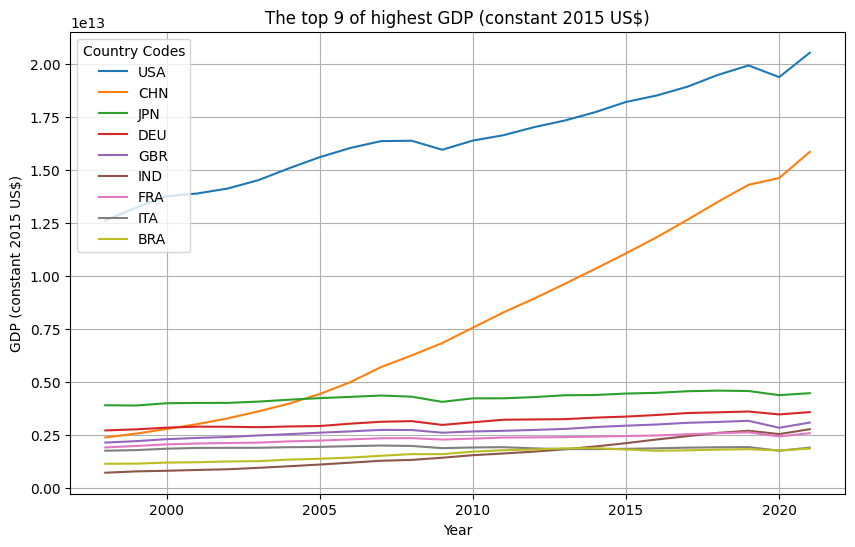

In [580]:
#Creating a line graph to visualize the GDP over time for the top 9 countries with the highest GDP (constant 2015 US$) in 2021
plot_country_data(GDP_cons_df, top_gdp9_countries, "GDP (constant 2015 US$)", 
                  "GDP (constant 2015 US$)", "The top 9 of highest GDP (constant 2015 US$)")

In [581]:
GDP_cons_df_21 = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021]
GDP_cons_df_21

,,Coal rents (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Forest rents (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (constant 2015 US$),GDP (current US$),Gini index,"Government expenditure on education, total (% of GDP)",...,Mineral rents (% of GDP),Natural gas rents (% of GDP),Oil rents (% of GDP),"Population, total",Research and development expenditure (% of GDP),Ores and metals exports (% of merchandise exports),Ores and metals imports (% of merchandise imports),Total natural resources rents (% of GDP),Human Development Index,GDP_pc
Code,Year,,,,,,,,,,,,,,,,,,,,,
AUS,2021,0.786460,NaN,21.976819,0.123032,27.706072,10.267777,1.521232e+12,1.559034e+12,NaN,5.556048,...,10.465775,1.718406,0.264201,25685412,NaN,42.842322,1.788461,13.357875,0.951,59225.524540
BRA,2021,0.014315,NaN,19.561677,0.763405,13.657832,13.600847,1.847863e+12,1.649623e+12,52.9,NaN,...,4.488940,0.069994,2.604457,214326223,NaN,19.771212,3.913755,7.941112,0.754,8621.731582
CAN,2021,0.073021,11.678823,30.913988,0.068031,25.866069,6.186470,1.690932e+12,2.001487e+12,NaN,4.594006,...,1.184260,0.793958,2.829785,38226498,1.69727,8.946462,4.124978,4.949056,0.936,44234.542136
CHN,2021,0.607569,NaN,19.943974,0.070843,1.239561,15.925086,1.585128e+13,1.782046e+13,NaN,3.297843,...,0.510049,0.210525,0.308579,1412360000,2.43260,1.373866,15.275526,1.707565,0.768,11223.255348
DEU,2021,0.014481,12.805395,47.279520,0.030870,2.601563,8.720657,3.569114e+12,4.278504e+12,NaN,4.530964,...,0.000000,0.017699,0.014035,83196078,3.14246,3.375514,5.270312,0.077085,0.942,42900.022519
ESP,2021,0.000000,NaN,34.176423,0.017967,6.005503,12.986291,1.251379e+12,1.445652e+12,NaN,4.585320,...,0.096496,0.000567,0.000151,47415794,1.42929,3.888198,4.151536,0.115181,0.905,26391.597225
FRA,2021,0.000000,NaN,30.034994,0.025297,3.192901,10.002801,2.575192e+12,2.959356e+12,NaN,5.245027,...,0.000000,0.000138,0.007102,67764304,2.21918,2.594381,2.665344,0.032537,0.903,38002.194236
GBR,2021,0.001023,11.939087,29.597313,0.000000,8.329356,10.269732,3.075810e+12,3.141506e+12,NaN,5.327368,...,0.000058,0.171322,0.416142,67026292,2.91476,6.911868,4.952173,0.588544,0.929,45889.611023
IND,2021,1.280292,NaN,21.514389,0.160726,14.284659,29.872840,2.761585e+12,3.150307e+12,34.2,4.635141,...,1.315224,0.077494,0.325610,1407563842,NaN,4.826800,5.461134,3.159345,0.633,1961.960889


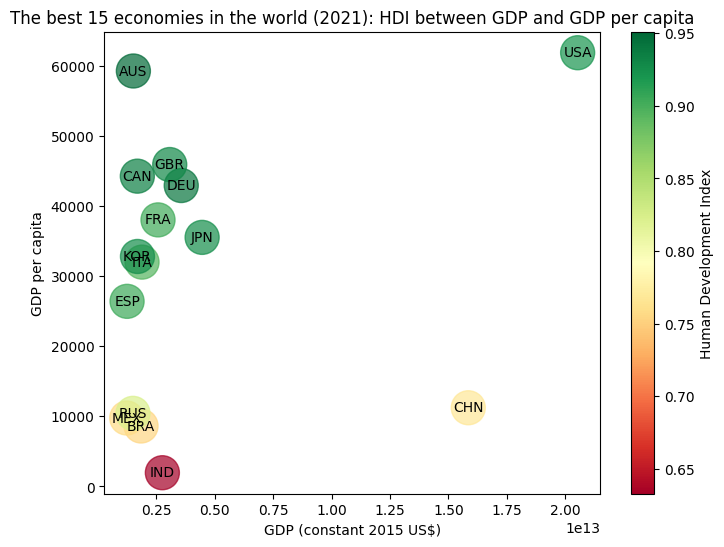

In [582]:

from matplotlib.cm import ScalarMappable

#Show the GDP per capita and Human Development Index for the best 15 economies in the world in the 2021
plt.figure(figsize=(8, 6))

#Scatter plot with GDP, GDP per capita, and Human Development Index
scatter = plt.scatter(GDP_cons_df_21["GDP (constant 2015 US$)"], GDP_cons_df_21["GDP_pc"],
                      s=600, c=GDP_cons_df_21["Human Development Index"], cmap="RdYlGn", alpha=0.7, label="GDP")

#Labels with country names for each point
for i, code in enumerate(GDP_cons_df_21.index.get_level_values("Code")):
    plt.annotate(code,(GDP_cons_df_21["GDP (constant 2015 US$)"].iloc[i], GDP_cons_df_21["GDP_pc"].iloc[i]),
                 fontsize=10, ha="center",va="center",xytext=(0, 0), textcoords="offset points") 

plt.xlabel("GDP (constant 2015 US$)")
plt.ylabel("GDP per capita")
plt.title("The best 15 economies in the world (2021): HDI between GDP and GDP per capita")

#Color Bar
sm = ScalarMappable(cmap="RdYlGn")
sm.set_array(GDP_cons_df_21["Human Development Index"])

#Position of the bar
cbar = plt.colorbar(sm, label="Human Development Index", orientation="vertical", ax=plt.gca())
cbar.set_label("Human Development Index")

plt.show()

In [583]:
GDP_cons_df.index

MultiIndex([('AUS', 1998),
            ('AUS', 1999),
            ('AUS', 2000),
            ('AUS', 2001),
            ('AUS', 2002),
            ('AUS', 2003),
            ('AUS', 2004),
            ('AUS', 2005),
            ('AUS', 2006),
            ('AUS', 2007),
            ...
            ('USA', 2012),
            ('USA', 2013),
            ('USA', 2014),
            ('USA', 2015),
            ('USA', 2016),
            ('USA', 2017),
            ('USA', 2018),
            ('USA', 2019),
            ('USA', 2020),
            ('USA', 2021)],
           names=['Code', 'Year'], length=360)

In [584]:
GDP_cons_df.isna().sum()

Coal rents (% of GDP)                                      0
Current health expenditure (% of GDP)                     41
Exports of goods and services (% of GDP)                   0
Forest rents (% of GDP)                                    0
Fuel exports (% of merchandise exports)                    0
Fuel imports (% of merchandise imports)                    0
GDP (constant 2015 US$)                                    0
GDP (current US$)                                          0
Gini index                                               105
Government expenditure on education, total (% of GDP)     46
Imports of goods and services (% of GDP)                   0
Inflation, consumer prices (annual %)                      0
Manufactures exports (% of merchandise exports)            0
Manufactures imports (% of merchandise imports)            0
Merchandise exports (current US$)                          0
Merchandise imports (current US$)                          0
Merchandise trade (% of 

In [585]:
#Selecting the first 9 countries with the highest Military expenditure (% of GDP) in 2021 among the top 15 countries in the world based on GDP in 2021.
top_mil_countries= GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Military expenditure (% of GDP)", ascending=False).head(9)
print(top_mil_countries.index.get_level_values("Code"))

Index(['RUS', 'USA', 'KOR', 'IND', 'GBR', 'AUS', 'FRA', 'ITA', 'CHN'], dtype='object', name='Code')


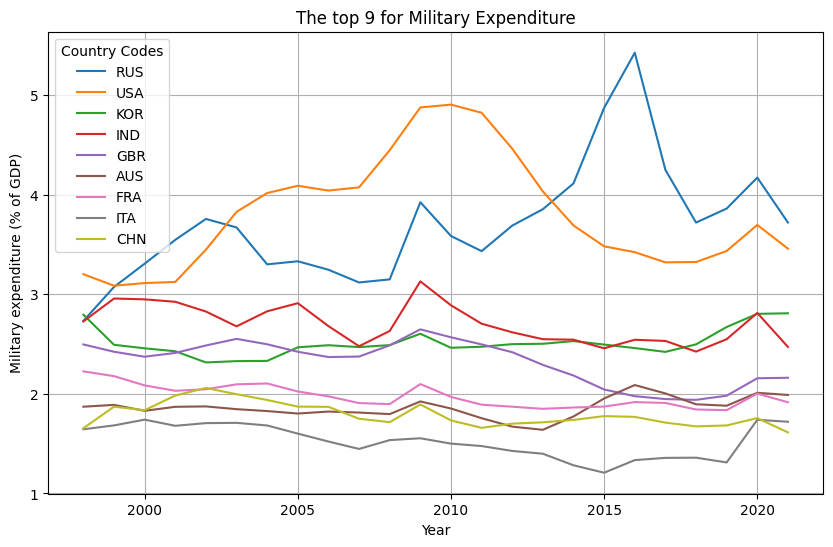

In [586]:
plot_country_data(GDP_cons_df, top_mil_countries, "Military expenditure (% of GDP)", 
                  "Military expenditure (% of GDP)", "The top 9 for Military Expenditure")

In [587]:
#Counting null values ​​of the column Research and development expenditure (% of GDP) for each country
null_rs_by_country = GDP_cons_df.groupby("Code")["Research and development expenditure (% of GDP)"].apply(lambda x: x.isna().sum())
print(null_rs_by_country)
GDP_cons_df.loc["AUS"]["Research and development expenditure (% of GDP)"]
#Nan for AUS present a distribution pretty spread out over the period, make sense interpolate on its too 

Code
AUS    12
BRA     3
CAN     0
CHN     0
DEU     0
ESP     0
FRA     0
GBR     0
IND     1
ITA     0
JPN     0
KOR     0
MEX     1
RUS     1
USA     0
Name: Research and development expenditure (% of GDP), dtype: int64


Year
1998    1.51356
1999        NaN
2000    1.57320
2001        NaN
2002    1.74749
2003        NaN
2004    1.84902
2005        NaN
2006    2.18011
2007        NaN
2008    2.39995
2009        NaN
2010    2.37075
2011    2.23484
2012        NaN
2013    2.17843
2014        NaN
2015    1.92071
2016        NaN
2017    1.87977
2018        NaN
2019    1.82892
2020        NaN
2021        NaN
Name: Research and development expenditure (% of GDP), dtype: float64

In [588]:
interpolate_country_nan(GDP_cons_df,"Research and development expenditure (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [589]:
#Selecting the first 9 countries with the highest Research and development expenditure (% of GDP) in 2021 among the top 15 countries in the world based on GDP in 2021.
top_rs_countries = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Research and development expenditure (% of GDP)", ascending=False).head(9)
print(top_rs_countries.index.get_level_values("Code"))

Index(['KOR', 'USA', 'JPN', 'DEU', 'GBR', 'CHN', 'FRA', 'AUS', 'CAN'], dtype='object', name='Code')


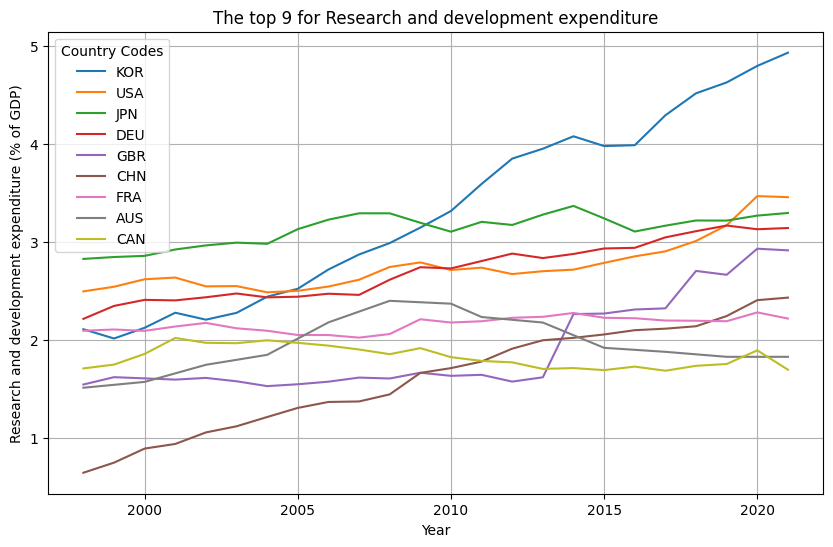

In [590]:
plot_country_data(GDP_cons_df, top_rs_countries, "Research and development expenditure (% of GDP)", 
                  "Research and development expenditure (% of GDP)", "The top 9 for Research and development expenditure")

In [591]:
#Counting null values ​​of the column Research and development expenditure (% of GDP) for each country
GDP_cons_df.groupby("Code")["Total natural resources rents (% of GDP)"].apply(lambda x: x.isna().sum())

Code
AUS    0
BRA    0
CAN    0
CHN    0
DEU    0
ESP    0
FRA    0
GBR    0
IND    0
ITA    0
JPN    0
KOR    0
MEX    0
RUS    0
USA    0
Name: Total natural resources rents (% of GDP), dtype: int64

In [592]:
#Selecting the first 9 countries with the highest Total natural resources rents (% of GDP) in 2021 among the top 15 countries in the world based on GDP in 2021
top_nr_countries  = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Total natural resources rents (% of GDP)", ascending=False).head(9)
print(top_nr_countries.index.get_level_values("Code"))

Index(['RUS', 'AUS', 'BRA', 'CAN', 'MEX', 'IND', 'CHN', 'USA', 'GBR'], dtype='object', name='Code')


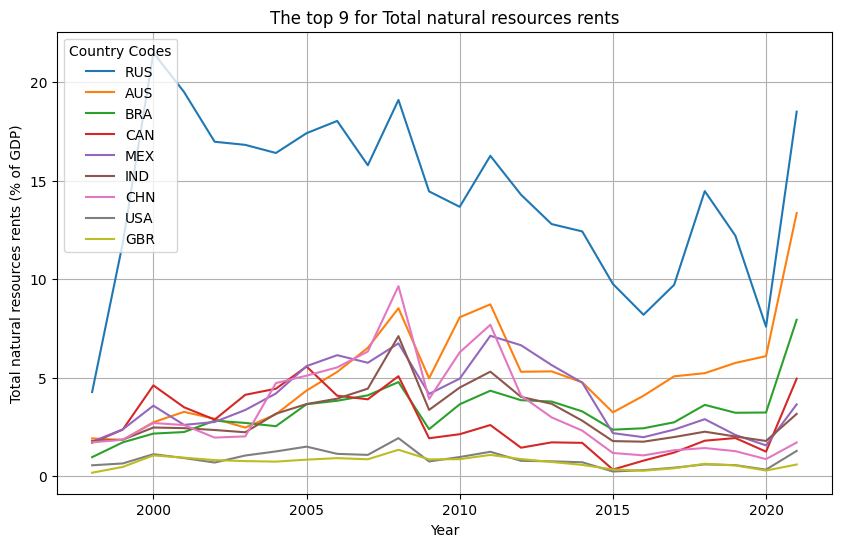

In [593]:
plot_country_data(GDP_cons_df, top_nr_countries, "Total natural resources rents (% of GDP)", 
                  "Total natural resources rents (% of GDP)", "The top 9 for Total natural resources rents")

In [594]:
null_he_by_country = GDP_cons_df.groupby("Code")["Current health expenditure (% of GDP)"].apply(lambda x: x.isna().sum())
print(null_he_by_country)
print(GDP_cons_df.loc["USA"]["Current health expenditure (% of GDP)"])
GDP_cons_df.loc["IND"]["Current health expenditure (% of GDP)"]


Code
AUS    3
BRA    3
CAN    2
CHN    3
DEU    2
ESP    3
FRA    3
GBR    2
IND    3
ITA    2
JPN    3
KOR    3
MEX    3
RUS    3
USA    3
Name: Current health expenditure (% of GDP), dtype: int64
Year
1998          NaN
1999          NaN
2000    12.487109
2001    13.164667
2002    13.991673
2003    14.501135
2004    14.546637
2005    14.574480
2006    14.703585
2007    14.914631
2008    15.204899
2009    16.198774
2010    16.195580
2011    16.137644
2012    16.116940
2013    15.986938
2014    16.192408
2015    16.481092
2016    16.793148
2017    16.767937
2018    16.640944
2019    16.676474
2020    18.815826
2021          NaN
Name: Current health expenditure (% of GDP), dtype: float64


Year
1998         NaN
1999         NaN
2000    4.034933
2001    4.262781
2002    4.240168
2003    4.008481
2004    3.957392
2005    3.791162
2006    3.634778
2007    3.517542
2008    3.514681
2009    3.485379
2010    3.272119
2011    3.246342
2012    3.329353
2013    3.749442
2014    3.619565
2015    3.595660
2016    3.504304
2017    2.935977
2018    2.858494
2019    2.943525
2020    2.959190
2021         NaN
Name: Current health expenditure (% of GDP), dtype: float64

In [595]:
interpolate_country_nan(GDP_cons_df,"Current health expenditure (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [596]:
top_he_countries = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2021].sort_values(by="Current health expenditure (% of GDP)", ascending=False).head(9)
print(top_he_countries.index.get_level_values("Code"))

Index(['USA', 'DEU', 'FRA', 'GBR', 'CAN', 'JPN', 'ESP', 'AUS', 'BRA'], dtype='object', name='Code')


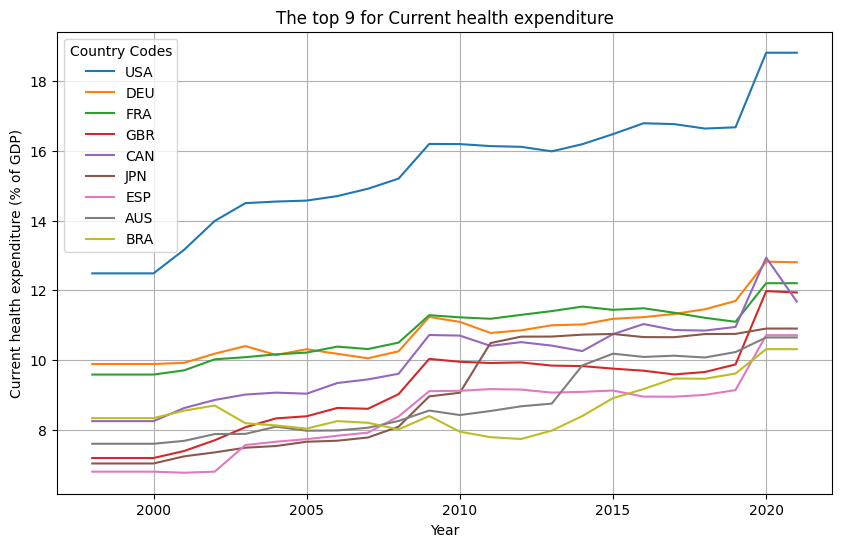

In [597]:
plot_country_data(GDP_cons_df, top_he_countries, "Current health expenditure (% of GDP)", 
                  "Current health expenditure (% of GDP)", "The top 9 for Current health expenditure")

In [598]:
Glob_21_df = sorted_21_gdp_df
Glob_98_df = Glob_df4.loc[Glob_df4.index.get_level_values("Year") == 1998].sort_values(by="GDP (constant 2015 US$)", ascending=False)
print(Glob_21_df)
Glob_98_df


           Coal rents (% of GDP)  Current health expenditure (% of GDP)  \
Code Year                                                                 
USA  2021               0.165542                                    NaN   
CHN  2021               0.607569                                    NaN   
JPN  2021               0.000357                                    NaN   
DEU  2021               0.014481                              12.805395   
GBR  2021               0.001023                              11.939087   
...                          ...                                    ...   
STP  2021               0.000000                                    NaN   
FSM  2021                    NaN                                    NaN   
PLW  2021                    NaN                                    NaN   
KIR  2021               0.000000                                    NaN   
TUV  2021                    NaN                                    NaN   

           Exports of go

,,Coal rents (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Forest rents (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),GDP (constant 2015 US$),GDP (current US$),Gini index,"Government expenditure on education, total (% of GDP)",...,Mineral rents (% of GDP),Natural gas rents (% of GDP),Oil rents (% of GDP),"Population, total",Research and development expenditure (% of GDP),Ores and metals exports (% of merchandise exports),Ores and metals imports (% of merchandise imports),Total natural resources rents (% of GDP),Human Development Index,GDP_pc
Code,Year,,,,,,,,,,,,,,,,,,,,,
USA,1998,0.162197,NaN,10.515261,0.074901,1.568877,6.581475,1.261086e+13,9.062818e+12,40.0,NaN,...,0.025027,0.211303,0.075559,275854000,2.49621,1.904051,2.380504,0.548987,0.893,45715.692645
JPN,1998,0.000062,NaN,10.373806,0.011195,0.318688,15.419648,3.892499e+12,4.098363e+12,NaN,3.29797,...,0.000606,0.002413,0.000715,126400000,2.82745,1.225580,5.966150,0.014991,0.871,30795.088890
DEU,1998,0.017108,NaN,26.406906,0.030331,1.032911,5.579886,2.704200e+12,2.238991e+12,28.1,4.46187,...,0.000095,0.002866,0.002498,82047195,2.21613,2.335836,3.519472,0.052897,0.879,32959.073569
CHN,1998,0.149940,NaN,18.342100,0.406925,2.815684,4.831367,2.371627e+12,1.029061e+12,NaN,1.84433,...,0.438149,0.085785,0.634592,1241935000,0.64689,2.003623,5.016529,1.715391,0.564,1909.622328
GBR,1998,0.002581,NaN,24.429620,0.005844,4.141033,2.470705,2.131755e+12,1.653695e+12,36.6,4.20466,...,0.000006,0.017839,0.145755,58487141,1.54649,2.062612,2.977709,0.172025,0.848,36448.264220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FSM,1998,NaN,NaN,18.753058,0.012990,NaN,NaN,2.925427e+08,2.188731e+08,NaN,NaN,...,0.000000,0.000000,NaN,111406,NaN,NaN,NaN,0.012990,0.572,2625.915211
PLW,1998,NaN,NaN,NaN,NaN,NaN,NaN,2.247193e+08,1.462975e+08,NaN,NaN,...,NaN,NaN,NaN,18852,NaN,NaN,NaN,0.000000,0.739,11920.183648
STP,1998,NaN,NaN,NaN,NaN,NaN,NaN,1.424850e+08,7.595113e+07,NaN,NaN,...,NaN,NaN,NaN,139790,NaN,NaN,NaN,2.978518,0.494,1019.278739


In [599]:
#Creating a function to classify countries based on their own performance using GDP per capita and Human Development Index.
def development_classes(row):
    if row['Human Development Index'] >= 0.8 and row['GDP_pc'] >= 11000:
        return "Developed"
    elif row["GDP (constant 2015 US$)"] >= 1.5e+12 or ((row["Human Development Index"] >= 0.8 and row["GDP_pc"] < 11000) or \
        (0.5 <= row["Human Development Index"] < 0.8 and row["GDP_pc"] >= 11000)  or \
            (0.5 <= row["Human Development Index"] < 0.8 and 3255 <= row["GDP_pc"] <= 11000)  or \
                (row["Human Development Index"] <= 0.5 and row["GDP_pc"] > 11000) or\
                    (row["Human Development Index"] > 0.8 and row["GDP_pc"] < 3255)):
        return "Developing"
    else:
        return "Underdeveloped"

Glob_21_df["Development_Class"] = Glob_21_df.apply(development_classes, axis=1)
Glob_98_df["Development_Class"] = Glob_98_df.apply(development_classes, axis=1)



In [600]:
Glob_21_df["Development_Class"].head(25)

Code  Year
USA   2021     Developed
CHN   2021    Developing
JPN   2021     Developed
DEU   2021     Developed
GBR   2021     Developed
IND   2021    Developing
FRA   2021     Developed
ITA   2021     Developed
BRA   2021    Developing
KOR   2021     Developed
CAN   2021     Developed
AUS   2021     Developed
RUS   2021    Developing
ESP   2021     Developed
MEX   2021    Developing
TUR   2021     Developed
IDN   2021    Developing
NLD   2021     Developed
CHE   2021     Developed
SAU   2021     Developed
POL   2021     Developed
SWE   2021     Developed
ARG   2021     Developed
BEL   2021     Developed
IRN   2021    Developing
Name: Development_Class, dtype: object

In [601]:
print(Glob_21_df.isna().sum())
Glob_98_df.isna().sum()

Coal rents (% of GDP)                                      9
Current health expenditure (% of GDP)                    150
Exports of goods and services (% of GDP)                  25
Forest rents (% of GDP)                                    4
Fuel exports (% of merchandise exports)                   29
Fuel imports (% of merchandise imports)                   26
GDP (constant 2015 US$)                                    0
GDP (current US$)                                          0
Gini index                                               149
Government expenditure on education, total (% of GDP)     39
Imports of goods and services (% of GDP)                  25
Inflation, consumer prices (annual %)                     17
Manufactures exports (% of merchandise exports)           25
Manufactures imports (% of merchandise imports)           25
Merchandise exports (current US$)                          1
Merchandise imports (current US$)                          0
Merchandise trade (% of 

Coal rents (% of GDP)                                      7
Current health expenditure (% of GDP)                    171
Exports of goods and services (% of GDP)                  20
Forest rents (% of GDP)                                    4
Fuel exports (% of merchandise exports)                   52
Fuel imports (% of merchandise imports)                   43
GDP (constant 2015 US$)                                    0
GDP (current US$)                                          0
Gini index                                               132
Government expenditure on education, total (% of GDP)     89
Imports of goods and services (% of GDP)                  20
Inflation, consumer prices (annual %)                     23
Manufactures exports (% of merchandise exports)           44
Manufactures imports (% of merchandise imports)           43
Merchandise exports (current US$)                          4
Merchandise imports (current US$)                          4
Merchandise trade (% of 

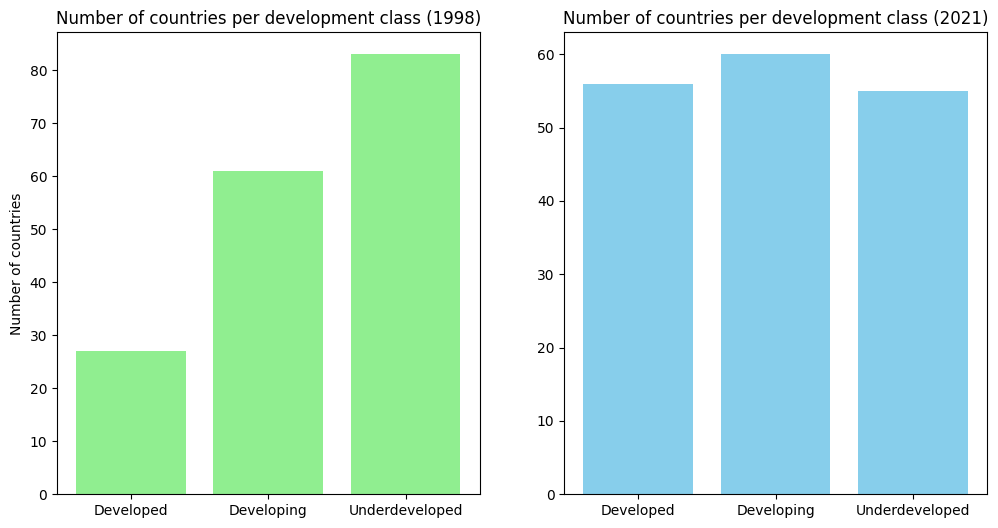

In [602]:
#Noting: 42 countries were deleted during the cleaning process due to a lack of data in the HDI and GDP columns. 
#It's likely that many of them could be classified in the Underdeveloped category.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(Glob_98_df["Development_Class"].value_counts().reindex(["Developed", "Developing", "Underdeveloped"]).index, 
           Glob_98_df["Development_Class"].value_counts().reindex(["Developed", "Developing", "Underdeveloped"]).values, color="lightgreen")
axs[0].set_title("Number of countries per development class (1998)")
axs[0].set_ylabel("Number of countries")

axs[1].bar(Glob_21_df["Development_Class"].value_counts().reindex(["Developed", "Developing", "Underdeveloped"]).index, 
           Glob_21_df["Development_Class"].value_counts().reindex(["Developed", "Developing", "Underdeveloped"]).values, color="skyblue")
axs[1].set_title("Number of countries per development class (2021)")

plt.show()


In [603]:
print(Glob_21_df.groupby("Development_Class")["Population, total"].sum())
Glob_98_df.groupby("Development_Class")["Population, total"].sum()

Development_Class
Developed         1364608769
Developing        4591342874
Underdeveloped    1578135042
Name: Population, total, dtype: int64


Development_Class
Developed          884951495
Developing        2249849761
Underdeveloped    2619712696
Name: Population, total, dtype: int64

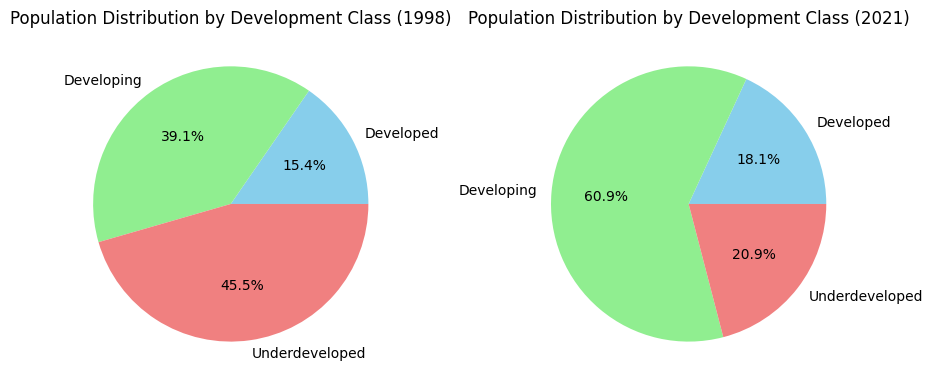

In [604]:
population_sum_1998 = {"Developed": 884951495,"Developing": 2249849761,"Underdeveloped": 2619712696}
population_sum_2021 = {"Developed": 1364608769, "Developing": 4591342874,"Underdeveloped": 1578135042}

fig, axs = plt.subplots(1, 2, figsize=(9, 7))

axs[0].pie(population_sum_1998.values(), labels=population_sum_1998.keys(), autopct='%1.1f%%', colors=["skyblue", "lightgreen", "lightcoral"])
axs[0].set_title("Population Distribution by Development Class (1998)")

axs[1].pie(population_sum_2021.values(), labels=population_sum_2021.keys(), autopct='%1.1f%%', colors=["skyblue", "lightgreen", "lightcoral"])
axs[1].set_title("Population Distribution by Development Class (2021)")

plt.tight_layout()
plt.show()

In [605]:
#Displaying the average percentage of GDP from natural resources rents for countries in 1998 and 2021.
print(f"1998:\n{Glob_98_df.groupby("Development_Class")["Total natural resources rents (% of GDP)"].mean()}\n2021:\n{Glob_21_df.groupby("Development_Class")["Total natural resources rents (% of GDP)"].mean()}")


1998:
Development_Class
Developed         1.016800
Developing        4.350060
Underdeveloped    7.954888
Name: Total natural resources rents (% of GDP), dtype: float64
2021:
Development_Class
Developed         4.896486
Developing        7.405499
Underdeveloped    9.680971
Name: Total natural resources rents (% of GDP), dtype: float64


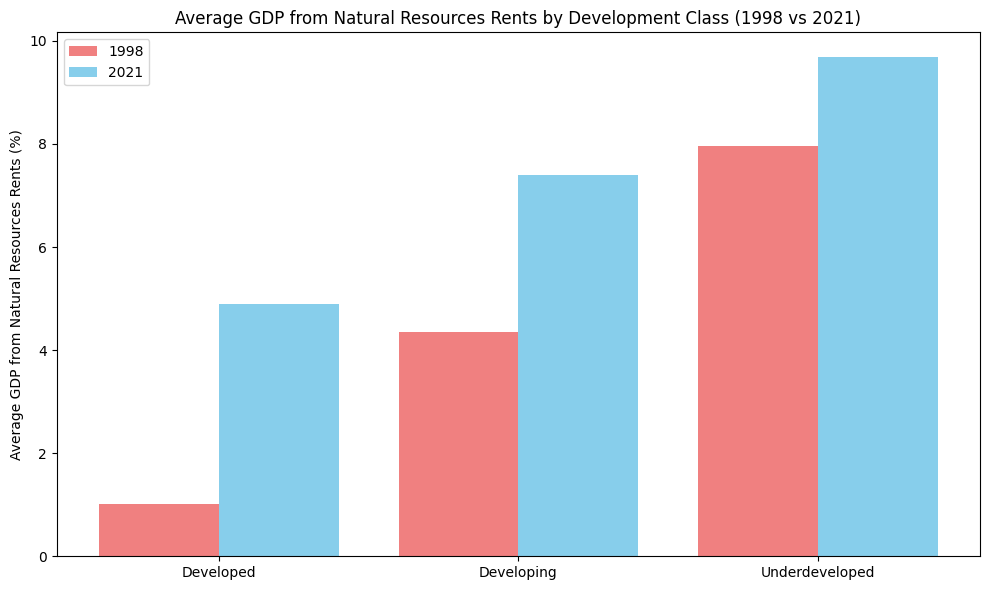

In [606]:
development_classes = ["Developed", "Developing", "Underdeveloped"]
nrr_1998 = [1.016800, 4.350060, 7.954888]
nrr_2021 = [4.896486, 7.405499, 9.680971]

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = (range(0,3))

bars1 = plt.bar(index, nrr_1998, bar_width, color = "lightcoral",label="1998")
bars2 = plt.bar([i + bar_width for i in index], nrr_2021, bar_width,color = "skyblue", label="2021")

plt.ylabel("Average GDP from Natural Resources Rents (%)")
plt.title("Average GDP from Natural Resources Rents by Development Class (1998 vs 2021)")
plt.xticks([i + bar_width/2 for i in index], development_classes)
plt.legend()

plt.tight_layout()
plt.show()


In [607]:
#Beginning the preparation of the dataset for applying the Linear Regression Model to predict GDP values.
#NaN values in columns intended for use as independent variables in the model will be filled.


In [608]:
Glob_df4.isna().sum()

Coal rents (% of GDP)                                     124
Current health expenditure (% of GDP)                     554
Exports of goods and services (% of GDP)                  424
Forest rents (% of GDP)                                    17
Fuel exports (% of merchandise exports)                   640
Fuel imports (% of merchandise imports)                   498
GDP (constant 2015 US$)                                     0
GDP (current US$)                                           0
Gini index                                               2552
Government expenditure on education, total (% of GDP)    1061
Imports of goods and services (% of GDP)                  424
Inflation, consumer prices (annual %)                     262
Manufactures exports (% of merchandise exports)           512
Manufactures imports (% of merchandise imports)           498
Merchandise exports (current US$)                          29
Merchandise imports (current US$)                          26
Merchand

In [609]:
Glob_df4.columns

Index(['Coal rents (% of GDP)', 'Current health expenditure (% of GDP)',
       'Exports of goods and services (% of GDP)', 'Forest rents (% of GDP)',
       'Fuel exports (% of merchandise exports)',
       'Fuel imports (% of merchandise imports)', 'GDP (constant 2015 US$)',
       'GDP (current US$)', 'Gini index',
       'Government expenditure on education, total (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Inflation, consumer prices (annual %)',
       'Manufactures exports (% of merchandise exports)',
       'Manufactures imports (% of merchandise imports)',
       'Merchandise exports (current US$)',
       'Merchandise imports (current US$)', 'Merchandise trade (% of GDP)',
       'Military expenditure (% of GDP)', 'Mineral rents (% of GDP)',
       'Natural gas rents (% of GDP)', 'Oil rents (% of GDP)',
       'Population, total', 'Research and development expenditure (% of GDP)',
       'Ores and metals exports (% of merchandise exports)',
       '

In [610]:
m_rent_mask = Glob_df4.groupby("Code")["Mineral rents (% of GDP)"].apply(lambda x: x.isna().sum())
m_rent_mask[m_rent_mask != 0]

Code
AFG    4
CUB    1
KWT    1
LBR    2
PLW    2
STP    3
SYR    1
YEM    3
Name: Mineral rents (% of GDP), dtype: int64

In [611]:
interpolate_country_nan(Glob_df4,"Mineral rents (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [612]:
ng_rent_mask = Glob_df4.groupby("Code")["Natural gas rents (% of GDP)"].apply(lambda x: x.isna().sum())
ng_rent_mask[m_rent_mask != 0]

Code
AFG     4
CUB     1
KWT     1
LBR     2
PLW    24
STP     3
SYR     1
YEM     3
Name: Natural gas rents (% of GDP), dtype: int64

In [613]:
Glob_df4.drop("PLW", level=0, inplace=True)

In [614]:
interpolate_country_nan(Glob_df4,"Natural gas rents (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [615]:
Glob_df4.isna().sum()

Coal rents (% of GDP)                                     100
Current health expenditure (% of GDP)                     551
Exports of goods and services (% of GDP)                  400
Forest rents (% of GDP)                                    15
Fuel exports (% of merchandise exports)                   619
Fuel imports (% of merchandise imports)                   486
GDP (constant 2015 US$)                                     0
GDP (current US$)                                           0
Gini index                                               2528
Government expenditure on education, total (% of GDP)    1040
Imports of goods and services (% of GDP)                  400
Inflation, consumer prices (annual %)                     258
Manufactures exports (% of merchandise exports)           494
Manufactures imports (% of merchandise imports)           486
Merchandise exports (current US$)                          29
Merchandise imports (current US$)                          26
Merchand

In [616]:
print(Glob_df4[Glob_df4["Natural gas rents (% of GDP)"].isna()].index)


MultiIndex([('AND', 1998),
            ('AND', 1999),
            ('AND', 2000),
            ('AND', 2001),
            ('AND', 2002),
            ('AND', 2003),
            ('AND', 2004),
            ('AND', 2005),
            ('AND', 2006),
            ('AND', 2007),
            ('AND', 2008),
            ('AND', 2009),
            ('AND', 2010),
            ('AND', 2011),
            ('AND', 2012),
            ('AND', 2013),
            ('AND', 2014),
            ('AND', 2015),
            ('AND', 2016),
            ('AND', 2017),
            ('AND', 2018),
            ('AND', 2019),
            ('AND', 2020),
            ('AND', 2021),
            ('SLE', 1998),
            ('SLE', 1999),
            ('SLE', 2000),
            ('SLE', 2001),
            ('SLE', 2002),
            ('SLE', 2003),
            ('SLE', 2004),
            ('SLE', 2005),
            ('SLE', 2006),
            ('SLE', 2007),
            ('SLE', 2008),
            ('SLE', 2009),
            ('SLE', 2010),
 

In [617]:
Glob_df4.drop("SLE", level=0, inplace=True)

In [618]:
mi_rent_mask = Glob_df4.groupby("Code")["Merchandise imports (current US$)"].apply(lambda x: x.isna().sum())
mi_rent_mask[mi_rent_mask != 0]


Code
AND    16
BEL     1
LUX     1
SRB     8
Name: Merchandise imports (current US$), dtype: int64

In [619]:
Glob_df4 = Glob_df4.drop("AND",level=0)
Glob_df4 = Glob_df4.drop("SRB",level=0)

In [620]:
interpolate_country_nan(Glob_df4,"Merchandise imports (current US$)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [621]:
fo_rent_mask = Glob_df4.groupby("Code")["Forest rents (% of GDP)"].apply(lambda x: x.isna().sum())
fo_rent_mask[fo_rent_mask != 0]

Code
AFG    4
CUB    1
KWT    1
LBR    2
STP    3
SYR    1
YEM    3
Name: Forest rents (% of GDP), dtype: int64

In [622]:
interpolate_country_nan(Glob_df4,"Forest rents (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [623]:
or_rent_mask = Glob_df4.groupby("Code")["Oil rents (% of GDP)"].apply(lambda x: x.isna().sum())
or_rent_mask[or_rent_mask != 0]

Code
AFG     4
BEN     5
CUB     1
FSM    24
GNQ     4
KHM     1
KWT     1
LBR     2
STP     3
SVN    10
SYR     1
TUV    24
YEM     3
Name: Oil rents (% of GDP), dtype: int64

In [624]:
Glob_df4.drop("FSM", level=0, inplace=True)
Glob_df4.drop("TUV", level=0, inplace=True)

In [625]:
interpolate_country_nan(Glob_df4,"Oil rents (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [626]:
mt_rent_mask = Glob_df4.groupby("Code")["Merchandise trade (% of GDP)"].apply(lambda x: x.isna().sum())
mt_rent_mask[fo_rent_mask != 0]

Code
AFG    4
CUB    0
KWT    0
LBR    2
STP    3
SYR    0
YEM    0
Name: Merchandise trade (% of GDP), dtype: int64

In [627]:
interpolate_country_nan(Glob_df4,"Merchandise trade (% of GDP)", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_13620\2451440174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [628]:
Glob_df4.isna().sum()

Coal rents (% of GDP)                                      28
Current health expenditure (% of GDP)                     536
Exports of goods and services (% of GDP)                  352
Forest rents (% of GDP)                                     0
Fuel exports (% of merchandise exports)                   540
Fuel imports (% of merchandise imports)                   425
GDP (constant 2015 US$)                                     0
GDP (current US$)                                           0
Gini index                                               2423
Government expenditure on education, total (% of GDP)     985
Imports of goods and services (% of GDP)                  352
Inflation, consumer prices (annual %)                     200
Manufactures exports (% of merchandise exports)           430
Manufactures imports (% of merchandise imports)           424
Merchandise exports (current US$)                           2
Merchandise imports (current US$)                           0
Merchand

In [629]:
#Selected these columns like indipendent variables because they don't present a lot Nan values
#and it's possible interpolate them without distort the data too much
"""GDP (current US$),Merchandise imports (current US$)
Mineral rents (% of GDP), Natural gas rents (% of GDP)
Population, total , Total natural resources rents (% of GDP)
Human Development Index, Forest rents (% of GDP)
Oil rents (% of GDP), Coal rents (% of GDP),Merchandise trade (% of GDP)"""

'GDP (current US$),Merchandise imports (current US$)\nMineral rents (% of GDP), Natural gas rents (% of GDP)\nPopulation, total , Total natural resources rents (% of GDP)\nHuman Development Index, Forest rents (% of GDP)\nOil rents (% of GDP), Coal rents (% of GDP),Merchandise trade (% of GDP)'

In [630]:
#Resetting the index to training and testing the model
Glob_df4_reset = Glob_df4.reset_index()

In [631]:
Glob_df4_reset.to_csv("Glob_df4_reset.csv", index= True)

In [632]:
Glob_df4_reset.columns[Glob_df4_reset.isna().sum() == 0]

Index(['Code', 'Year', 'Forest rents (% of GDP)', 'GDP (constant 2015 US$)',
       'GDP (current US$)', 'Merchandise imports (current US$)',
       'Merchandise trade (% of GDP)', 'Mineral rents (% of GDP)',
       'Natural gas rents (% of GDP)', 'Oil rents (% of GDP)',
       'Population, total', 'Total natural resources rents (% of GDP)',
       'Human Development Index', 'GDP_pc'],
      dtype='object')

In [633]:
from sklearn.linear_model import LinearRegression

In [634]:
features = ["GDP (current US$)","Merchandise imports (current US$)","Mineral rents (% of GDP)",
            "Natural gas rents (% of GDP)","Population, total","Total natural resources rents (% of GDP)",
            "Human Development Index","Forest rents (% of GDP)","Oil rents (% of GDP)", "Merchandise trade (% of GDP)"]

dipendent_variable = "GDP (constant 2015 US$)"

X = Glob_df4_reset[features]
y = Glob_df4_reset[dipendent_variable]

In [635]:
from sklearn.model_selection import train_test_split

#Subdivision of the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("Training set size:", X_train.shape, y_train.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)


Training set size: (2772, 10) (2772,)
Test set dimensions: (1188, 10) (1188,)


In [636]:
#Initialize the linear regression model
model = LinearRegression()

#Training the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [637]:
#Making predictions about the test set
y_pred = model.predict(X_test)

In [638]:
from sklearn.metrics import mean_squared_error, r2_score

#Some metrics to evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))
print("Intercept: ",model.intercept_)
print("Coefficient for each feature: ", model.coef_)

Mean Squared Error: 5.4484583224244515e+22
R^2: 0.9799715590323733
Intercept:  -42123236773.11755
Coefficient for each feature:  [ 1.04019139e+00 -3.03230857e-01 -1.08689259e+09  1.02692128e+09
  4.77261013e+02 -2.13226323e+07  5.12569901e+10  2.05133421e+08
 -2.19382180e+08  2.30554002e+08]


In [639]:
#Doing some prediction to observing the predicted values by the model and the real data from the GDP column
X_ita = Glob_df4_reset[Glob_df4_reset["Code"] == "ITA"][features]
model.predict(X_ita)

array([1.29081303e+12, 1.27211888e+12, 1.15818352e+12, 1.18146829e+12,
       1.29110019e+12, 1.58876866e+12, 1.81022138e+12, 1.85566190e+12,
       1.93426769e+12, 2.18816850e+12, 2.37662749e+12, 2.20219499e+12,
       2.11574267e+12, 2.26026156e+12, 2.06519260e+12, 2.12522228e+12,
       2.14791845e+12, 1.82883103e+12, 1.87211604e+12, 1.94682387e+12,
       2.06750952e+12, 1.99207528e+12, 1.88735408e+12, 2.11456475e+12])

In [640]:
Glob_df4.loc["ITA"]["GDP (current US$)"]

Year
1998    1.270053e+12
1999    1.252447e+12
2000    1.146677e+12
2001    1.168023e+12
2002    1.276769e+12
2003    1.577622e+12
2004    1.806543e+12
2005    1.858217e+12
2006    1.949552e+12
2007    2.213102e+12
2008    2.408655e+12
2009    2.199929e+12
2010    2.136100e+12
2011    2.294994e+12
2012    2.086958e+12
2013    2.141924e+12
2014    2.162010e+12
2015    1.836638e+12
2016    1.877072e+12
2017    1.961796e+12
2018    2.091932e+12
2019    2.011302e+12
2020    1.897462e+12
2021    2.155360e+12
Name: GDP (current US$), dtype: float64

In [641]:
X_usa = Glob_df4_reset[Glob_df4_reset["Code"] == "USA"][features]
model.predict(X_usa)

array([9.28032670e+12, 9.83803462e+12, 1.04243961e+13, 1.07938550e+13,
       1.11496023e+13, 1.16686181e+13, 1.23941406e+13, 1.31882502e+13,
       1.39410005e+13, 1.45966301e+13, 1.48607683e+13, 1.47281501e+13,
       1.52136058e+13, 1.56981382e+13, 1.63586416e+13, 1.69747675e+13,
       1.76866290e+13, 1.83985808e+13, 1.89280064e+13, 1.96948400e+13,
       2.07316743e+13, 2.16284586e+13, 2.13444489e+13, 2.35303642e+13])

In [642]:
Glob_df4.loc["USA"]["GDP (current US$)"]

Year
1998    9.062818e+12
1999    9.631174e+12
2000    1.025095e+13
2001    1.058193e+13
2002    1.092911e+13
2003    1.145644e+13
2004    1.221719e+13
2005    1.303920e+13
2006    1.381559e+13
2007    1.447423e+13
2008    1.476986e+13
2009    1.447806e+13
2010    1.504896e+13
2011    1.559973e+13
2012    1.625397e+13
2013    1.684319e+13
2014    1.755068e+13
2015    1.820602e+13
2016    1.869511e+13
2017    1.947734e+13
2018    2.053306e+13
2019    2.138098e+13
2020    2.106047e+13
2021    2.331508e+13
Name: GDP (current US$), dtype: float64

In [643]:
X_chn = Glob_df4_reset[Glob_df4_reset["Code"] == "CHN"][features]
model.predict(X_chn)

array([1.61418621e+12, 1.67997055e+12, 1.79074652e+12, 1.92313020e+12,
       2.04951643e+12, 2.21768107e+12, 2.48534977e+12, 2.80367190e+12,
       3.25267098e+12, 4.03536673e+12, 5.06990814e+12, 5.63867031e+12,
       6.54901164e+12, 7.97029258e+12, 8.97359160e+12, 1.00182590e+13,
       1.09613196e+13, 1.16589358e+13, 1.18688489e+13, 1.29161700e+13,
       1.44793291e+13, 1.48996515e+13, 1.53293399e+13, 1.84006834e+13])

In [644]:
Glob_df4.loc["CHN"]["GDP (current US$)"]

Year
1998    1.029061e+12
1999    1.094010e+12
2000    1.211332e+12
2001    1.339401e+12
2002    1.470558e+12
2003    1.660281e+12
2004    1.955347e+12
2005    2.285961e+12
2006    2.752119e+12
2007    3.550328e+12
2008    4.594337e+12
2009    5.101691e+12
2010    6.087192e+12
2011    7.551546e+12
2012    8.532185e+12
2013    9.570471e+12
2014    1.047562e+13
2015    1.106157e+13
2016    1.123331e+13
2017    1.231049e+13
2018    1.389491e+13
2019    1.427997e+13
2020    1.468774e+13
2021    1.782046e+13
Name: GDP (current US$), dtype: float64